<a href="https://colab.research.google.com/github/maoya23/ibio/blob/master/regression_by_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

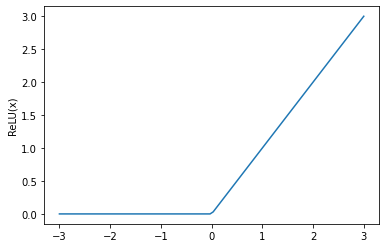

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
None


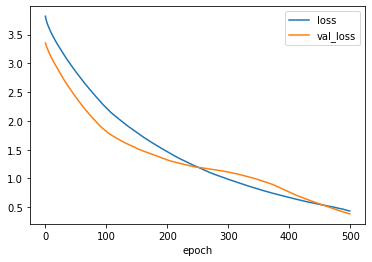

loss        0.43521
val_loss    0.38459
Name: 499, dtype: float64
0.41966931897544846


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import activations,callbacks,layers,models
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

my_url=('https://raw.githubusercontent.com/taroyabuki''/fromzero/master/data/wine.csv')
tmp=pd.read_csv(my_url)

my_data=shuffle(tmp)#Kerasでは検証データは後ろからとるので偏らないようにシャッフルをする。


my_scaler=StandardScaler()
X=my_scaler.fit_transform(my_data.drop(columns=['LPRICE2']))#データを入力変数と出力変数に分けた後にStandarsScalerで標準化する。
y=my_data['LPRICE2']

x=np.linspace(-3,3,100)
plt.plot(x,activations.relu(x))
plt.xlabel=('x')
plt.ylabel('ReLU(x)')
plt.show()

my_model=models.Sequential() #ニューロンのモデルを指定
my_model.add(layers.Dense(units=3,activation='relu',input_shape=[4])) #units=3で中間層のニューロン数を指定する。activationで活性化関数を指定する。input_shapeで入力層の数を指定する。
my_model.add(layers.Dense(units=1)) #これは出力層の数を指定。

print(my_model.summary())

my_model.compile(loss='mse',optimizer='rmsprop')#lossは損失関数で回帰ではmseを使う。optimizerは最適化器で損失関数からネットワークを組みなおすもので今回はRMSpropを使用する。

my_cb=callbacks.EarlyStopping(patience=20,restore_best_weights=True)#損失関数の値が減少しないことが20エポック続いたら停止して最良のネットワークを返す。つまり、学習が進まなくなったら学習を止める。

my_history=my_model.fit(
    x=X,
    y=y,
    validation_split=0.25,  #全データの25％を検証に使うということ
    batch_size=10,  #データセットを小分けにした数
    epochs=500, #訓練データをバッチサイズで割ると全データを処理したことになるが、その一回の処理を１エポックとする。
    callbacks=[my_cb],#どうなったら学習をやめるか。をしてい。callbacksは訓練中に適用される関数集合
    verbose=0) #途中経過を表示しないことを指定する。

#参考にしたいURL https://zenn.dev/nekoallergy/articles/5c9c4ad0657073

tmp=pd.DataFrame(my_history.history)
tmp.plot(xlabel='epoch')#訓練でのMSEがloss、検証でのMSEがval_lossになる。
plt.show()

print(tmp.iloc[-1, ])
y_=my_model.predict(X)
print(((y_.ravel()-y)**2).mean())